In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
import planarity
from networkx.algorithms import community
import collections
import os
import math
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [2]:
file_name = sorted(os.listdir('year_info'))
print(len(file_name))
raw_data = pd.read_csv('/Users/dongzhang/6980/newMission/wind金融数据/stock_data/cleaned_data.csv',index_col=0)
name_need = raw_data[raw_data['month']=='2020-12'][['简称','subsector']].drop_duplicates()
name_need.set_index(["简称"], inplace=True)

12


In [3]:

def remove_fixed_num(n):

### 两个子行业比较
    ### 货币金融
    plt.suptitle(f'remove_nodes,n={n}')
    all_result2 = []
    pmfg_nodes2 = []
    for i in range(len(file_name)):
        pmfg = nx.read_gpickle(f'year_info/{file_name[i]}')
        pmfg_nodes2.append(pmfg.number_of_nodes())
        degree_dict = dict(pmfg.degree())
        list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
        degree_dict = [k for k,v in list1]
        degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
        degree_df.index=degree_df[f'{file_name[i][:-8]}']
        degree_df = pd.concat([degree_df,name_need],axis=1).dropna()
        ccp_list = []
        for j in range(n):
            pmfg.remove_node(degree_df[degree_df['subsector']=='货币金融'].iloc[j].values[0])
            size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
            ccp_list.append(size_of_ccp)
        all_result2.append(ccp_list[-1])
    plt.subplot(1,3,1)
    y2 = np.array(all_result2)/pmfg_nodes2
    plt.scatter(file_name,y2,label=f' 货币金融',color='y',alpha=0.7,s=[100/x for x in y2])
    plt.legend()       
    plt.xticks(range(len(file_name)), [file_name[x][:-8] for x in range(len(file_name))],rotation='90' )

    ### 资本市场服务
    all_result4 = []
    pmfg_nodes4 = []
    for i in range(len(file_name)):
        pmfg = nx.read_gpickle(f'year_info/{file_name[i]}')
        pmfg_nodes4.append(pmfg.number_of_nodes())
        degree_dict = dict(pmfg.degree())
        list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
        degree_dict = [k for k,v in list1]
        degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
        degree_df.index=degree_df[f'{file_name[i][:-8]}']
        degree_df = pd.concat([degree_df,name_need],axis=1).dropna()
        ccp_list = []
        for j in range(n):
            pmfg.remove_node(degree_df[degree_df['subsector']=='资本市场服务'].iloc[j].values[0])
            size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
            ccp_list.append(size_of_ccp)
        all_result4.append(ccp_list[-1])
    plt.subplot(1,3,3)    
    y4 = np.array(all_result4)/pmfg_nodes4
    plt.scatter(file_name,y4,label=f' 资本市场服务',color='r',alpha=0.7,s=[100/x for x in y4])
    plt.legend()
    plt.xticks(range(len(file_name)), [file_name[x][:-8] for x in range(len(file_name))],rotation='90' )
    plt.show()

In [4]:

def final_pk(n):
    ### 两个子模块相互比较
    ###  货币金融
    # plt.figure(figsize=(15,10))
    all_result2 = []
    pmfg_nodes2 = []
    for i in range(len(file_name)):
        pmfg = nx.read_gpickle(f'year_info/{file_name[i]}')
        pmfg_nodes2.append(pmfg.number_of_nodes())
        degree_dict = dict(pmfg.degree())
        list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
        degree_dict = [k for k,v in list1]
        degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
        degree_df.index=degree_df[f'{file_name[i][:-8]}']
        degree_df = pd.concat([degree_df,name_need],axis=1).dropna()

        ccp_list = []
        for j in range(n):
            # print(degree_df[degree_df['subsector']=='保险业'])
            pmfg.remove_node(degree_df[degree_df['subsector']=='货币金融'].iloc[j].values[0])
            size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
            ccp_list.append(size_of_ccp)
        all_result2.append(ccp_list[-1])
    # plt.subplot(1,3,1)
    y2 = np.array(all_result2)/pmfg_nodes2
    # plt.scatter(file_name,y2,label=f' 货币金融',color='y',alpha=0.7,s=[100/x for x in y2])
    # plt.legend()        
    # plt.xticks(range(len(file_name)), [file_name[x][:-8] if x%6==0 else '' for x in range(len(file_name))],rotation='90' )

    ### 资本市场服务
    all_result4 = []
    pmfg_nodes4 = []
    for i in range(len(file_name)):
        pmfg = nx.read_gpickle(f'year_info/{file_name[i]}')
        pmfg_nodes4.append(pmfg.number_of_nodes())
        degree_dict = dict(pmfg.degree())
        list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
        degree_dict = [k for k,v in list1]
        degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
        degree_df.index=degree_df[f'{file_name[i][:-8]}']
        degree_df = pd.concat([degree_df,name_need],axis=1).dropna()
        ccp_list = []
        for j in range(n):
            pmfg.remove_node(degree_df[degree_df['subsector']=='资本市场服务'].iloc[j].values[0])
            size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
            ccp_list.append(size_of_ccp)
        all_result4.append(ccp_list[-1])
    # plt.subplot(1,3,2)    
    y4 = np.array(all_result4)/pmfg_nodes4
    # plt.scatter(file_name,y4,label=f' 资本市场服务',color='r',alpha=0.7,s=[100/x for x in y4])
    # plt.legend()
    # plt.xticks(range(len(file_name)), [file_name[x][:-8] if x%6==0 else '' for x in range(len(file_name))],rotation='90' )
    pk = np.array(y2)-np.array(y4)
    # plt.subplot(1,3,3)
    # plt.plot(range(len(file_name)),pk)
    # plt.show()
    return pk



In [5]:
pks = []
for i in range(1,16):
    pks.append(final_pk(i))


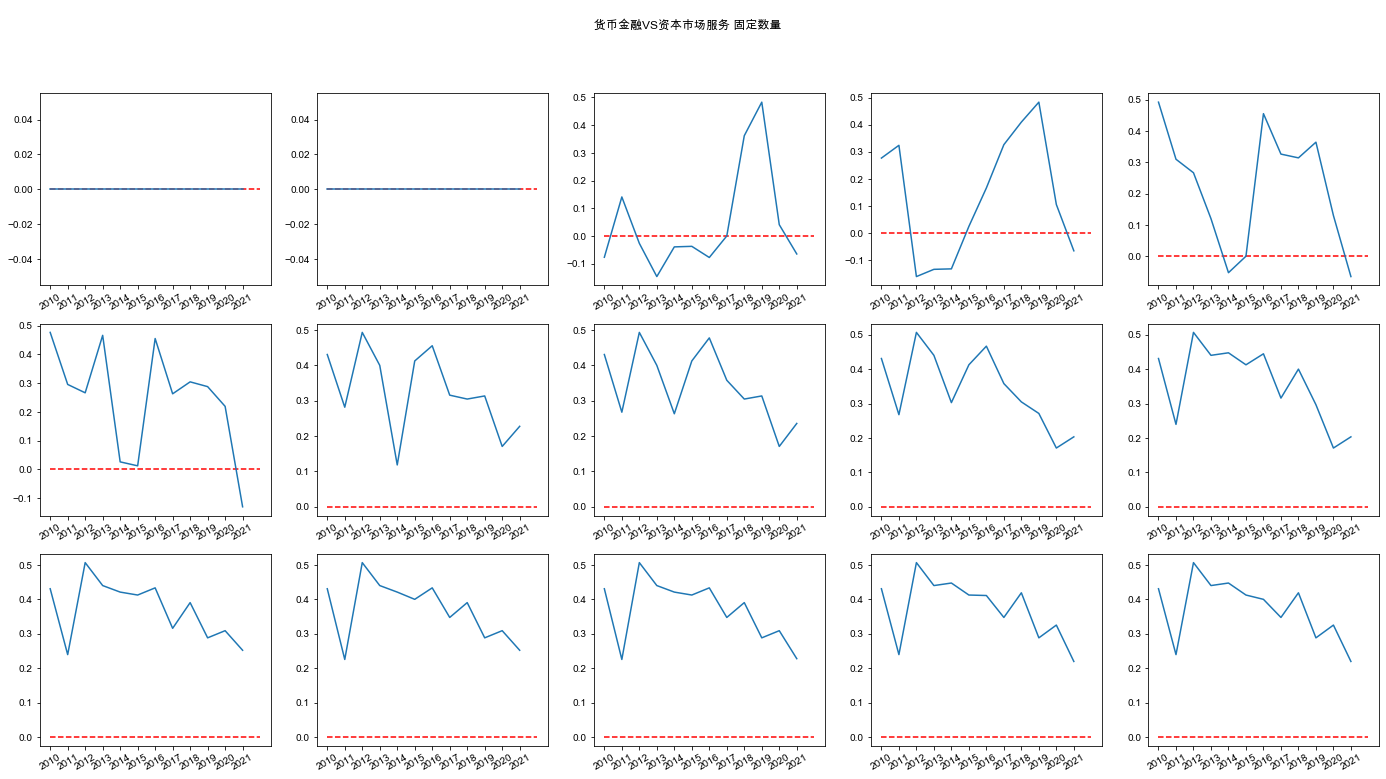

In [15]:
# plt.figure(figsize=(24,12))
plt.figure(figsize=(24,12))
plt.suptitle('\n货币金融VS资本市场服务 固定数量')
for i in range(1,16):
    plt.subplot(3,5,i)
    plt.hlines(0,xmax=len(file_name),xmin=0,colors='r',linestyles = "dashed")
    plt.plot(range(len(file_name)),pks[i-1],'-')
    plt.xticks(range(len(file_name)), [file_name[x][:-8] for x in range(len(file_name))],rotation='30' )
plt.savefig('pk.png')
plt.show()

In [7]:
nums = []
for i in range(len(pks)):
    nums.append(len(pks[i][pks[i]<0]))

In [8]:
nums

[0, 0, 7, 4, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

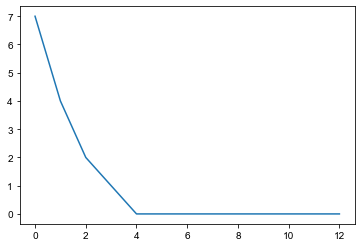

In [9]:
plt.plot(range(len(nums[2:])),nums[2:])

In [13]:

def final_pk_per(percetage):
    ### 两个子模块相互比较
    ###  货币金融
    # plt.figure(figsize=(15,10))
    all_result2 = []
    pmfg_nodes2 = []
    for i in range(len(file_name)):
        pmfg = nx.read_gpickle(f'year_info/{file_name[i]}')
        pmfg_nodes2.append(pmfg.number_of_nodes())
        degree_dict = dict(pmfg.degree())
        list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
        degree_dict = [k for k,v in list1]
        degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
        degree_df.index=degree_df[f'{file_name[i][:-8]}']
        degree_df = pd.concat([degree_df,name_need],axis=1).dropna()
        number_of_huobi = degree_df[degree_df['subsector']=='货币金融'].shape[0]
        ccp_list = []
        # print('number_of_ziben:',number_of_ziben)
        # print('1:  ',math.ceil(percetage*number_of_huobi))
        for j in range(math.ceil(percetage*number_of_huobi)):
            # print(degree_df[degree_df['subsector']=='保险业'])
            pmfg.remove_node(degree_df[degree_df['subsector']=='货币金融'].iloc[j].values[0])
            size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
            ccp_list.append(size_of_ccp)
        all_result2.append(ccp_list[-1])
    # plt.subplot(1,3,1)
    y2 = np.array(all_result2)/pmfg_nodes2
    # plt.scatter(file_name,y2,label=f' 货币金融',color='y',alpha=0.7,s=[100/x for x in y2])
    # plt.legend()        
    # plt.xticks(range(len(file_name)), [file_name[x][:-8] if x%6==0 else '' for x in range(len(file_name))],rotation='90' )

    ### 资本市场服务
    all_result4 = []
    pmfg_nodes4 = []
    for i in range(len(file_name)):
        pmfg = nx.read_gpickle(f'year_info/{file_name[i]}')
        pmfg_nodes4.append(pmfg.number_of_nodes())
        degree_dict = dict(pmfg.degree())
        list1= sorted(dict(pmfg.degree()).items(),key=lambda x:x[1],reverse=True)
        degree_dict = [k for k,v in list1]
        degree_df = pd.DataFrame(degree_dict,columns=[f'{file_name[i][:-8]}'])
        degree_df.index=degree_df[f'{file_name[i][:-8]}']
        degree_df = pd.concat([degree_df,name_need],axis=1).dropna()
        number_of_ziben = degree_df[degree_df['subsector']=='资本市场服务'].shape[0]
        ccp_list = []
        # print('number_of_ziben:',number_of_ziben)
        # print('2:   ',math.ceil(percetage*number_of_ziben))
        for j in range(math.ceil(percetage*number_of_ziben)):
            pmfg.remove_node(degree_df[degree_df['subsector']=='资本市场服务'].iloc[j].values[0])
            size_of_ccp = len(max(nx.connected_components(pmfg),key=len))
            ccp_list.append(size_of_ccp)
        all_result4.append(ccp_list[-1])
    # plt.subplot(1,3,2)    
    y4 = np.array(all_result4)/pmfg_nodes4
    # plt.scatter(file_name,y4,label=f' 资本市场服务',color='r',alpha=0.7,s=[100/x for x in y4])
    # plt.legend()
    # plt.xticks(range(len(file_name)), [file_name[x][:-8] if x%6==0 else '' for x in range(len(file_name))],rotation='90' )
    pk = np.array(y2)-np.array(y4)
    # plt.subplot(1,3,3)
    # plt.plot(range(len(file_name)),pk)
    # plt.show()
    return pk



In [14]:
pks_p = []
for i in [0.01,0.02,0.04,0.06,0.08,0.09]:
    pks_p.append(final_pk_per(i))


In [50]:
# pks_p

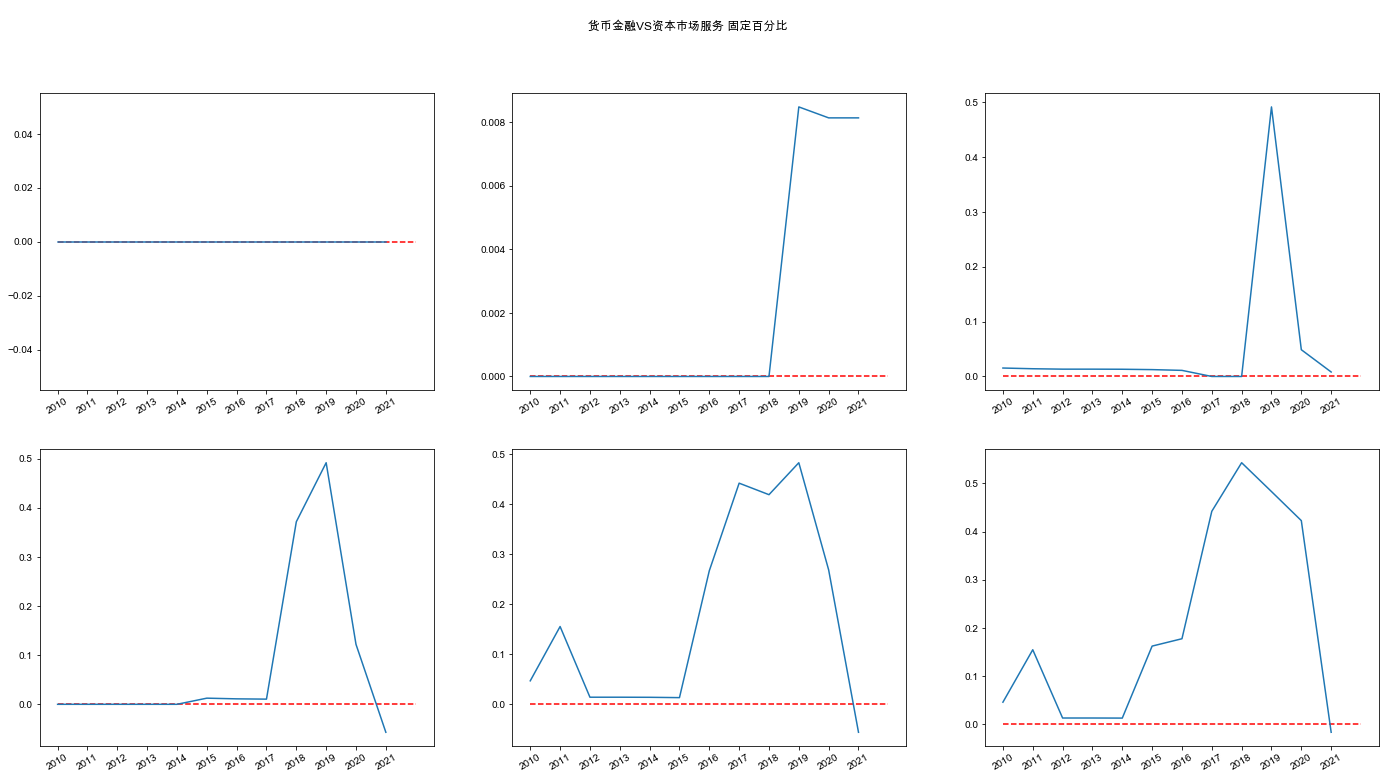

In [16]:
# plt.figure(figsize=(24,12))
plt.figure(figsize=(24,12))
plt.suptitle('\n货币金融VS资本市场服务 固定百分比')
for i in range(len([0.01,0.02,0.04,0.06,0.08,0.09])):
    plt.subplot(2,3,i+1)
    plt.hlines(0,xmax=len(file_name),xmin=0,colors='r',linestyles = "dashed")
    plt.plot(range(len(file_name)),pks_p[i],'-')
    plt.xticks(range(len(file_name)), [file_name[x][:-8] for x in range(len(file_name))],rotation='30' )
plt.savefig('pk_p.png')
plt.show()